In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

# Read the column description and ensure you understand each attribute well

In [82]:
dfBank = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
print("The dataframe has %d rows" %dfBank.shape[0])
print("The dataframe has %d columns" %dfBank.shape[1])
dfBank.sample(5)

The dataframe has 5000 rows
The dataframe has 14 columns


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
37      38   51          25      71     95814       1    1.4          3   
682    683   58          34      12     90504       1    0.1          2   
330    331   54          30      78     92374       4    1.0          2   
2871  2872   65          39      82     94131       4    2.4          3   
1500  1501   54          28      74     95014       2    1.1          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
37         198              0                   0           0       0   
682          0              0                   0           0       0   
330          0              0                   0           0       1   
2871       252              0                   0           0       1   
1500         0              0                   0           0       1   

      CreditCard  
37             0  
682            1  
330            0  
2871           0  
1500           0

In [84]:
# Columns/Feature in dataset
dfBank.info()
# No columns have null data in the file
dfBank.apply(lambda x : sum(x.isnull()))
#finding unique data
dfBank.apply(lambda x: len(x.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Study the data distribution in each attribute, share your findings.

In [85]:
# Eye balling the data
dfBank.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<Figure size 2880x2880 with 0 Axes>

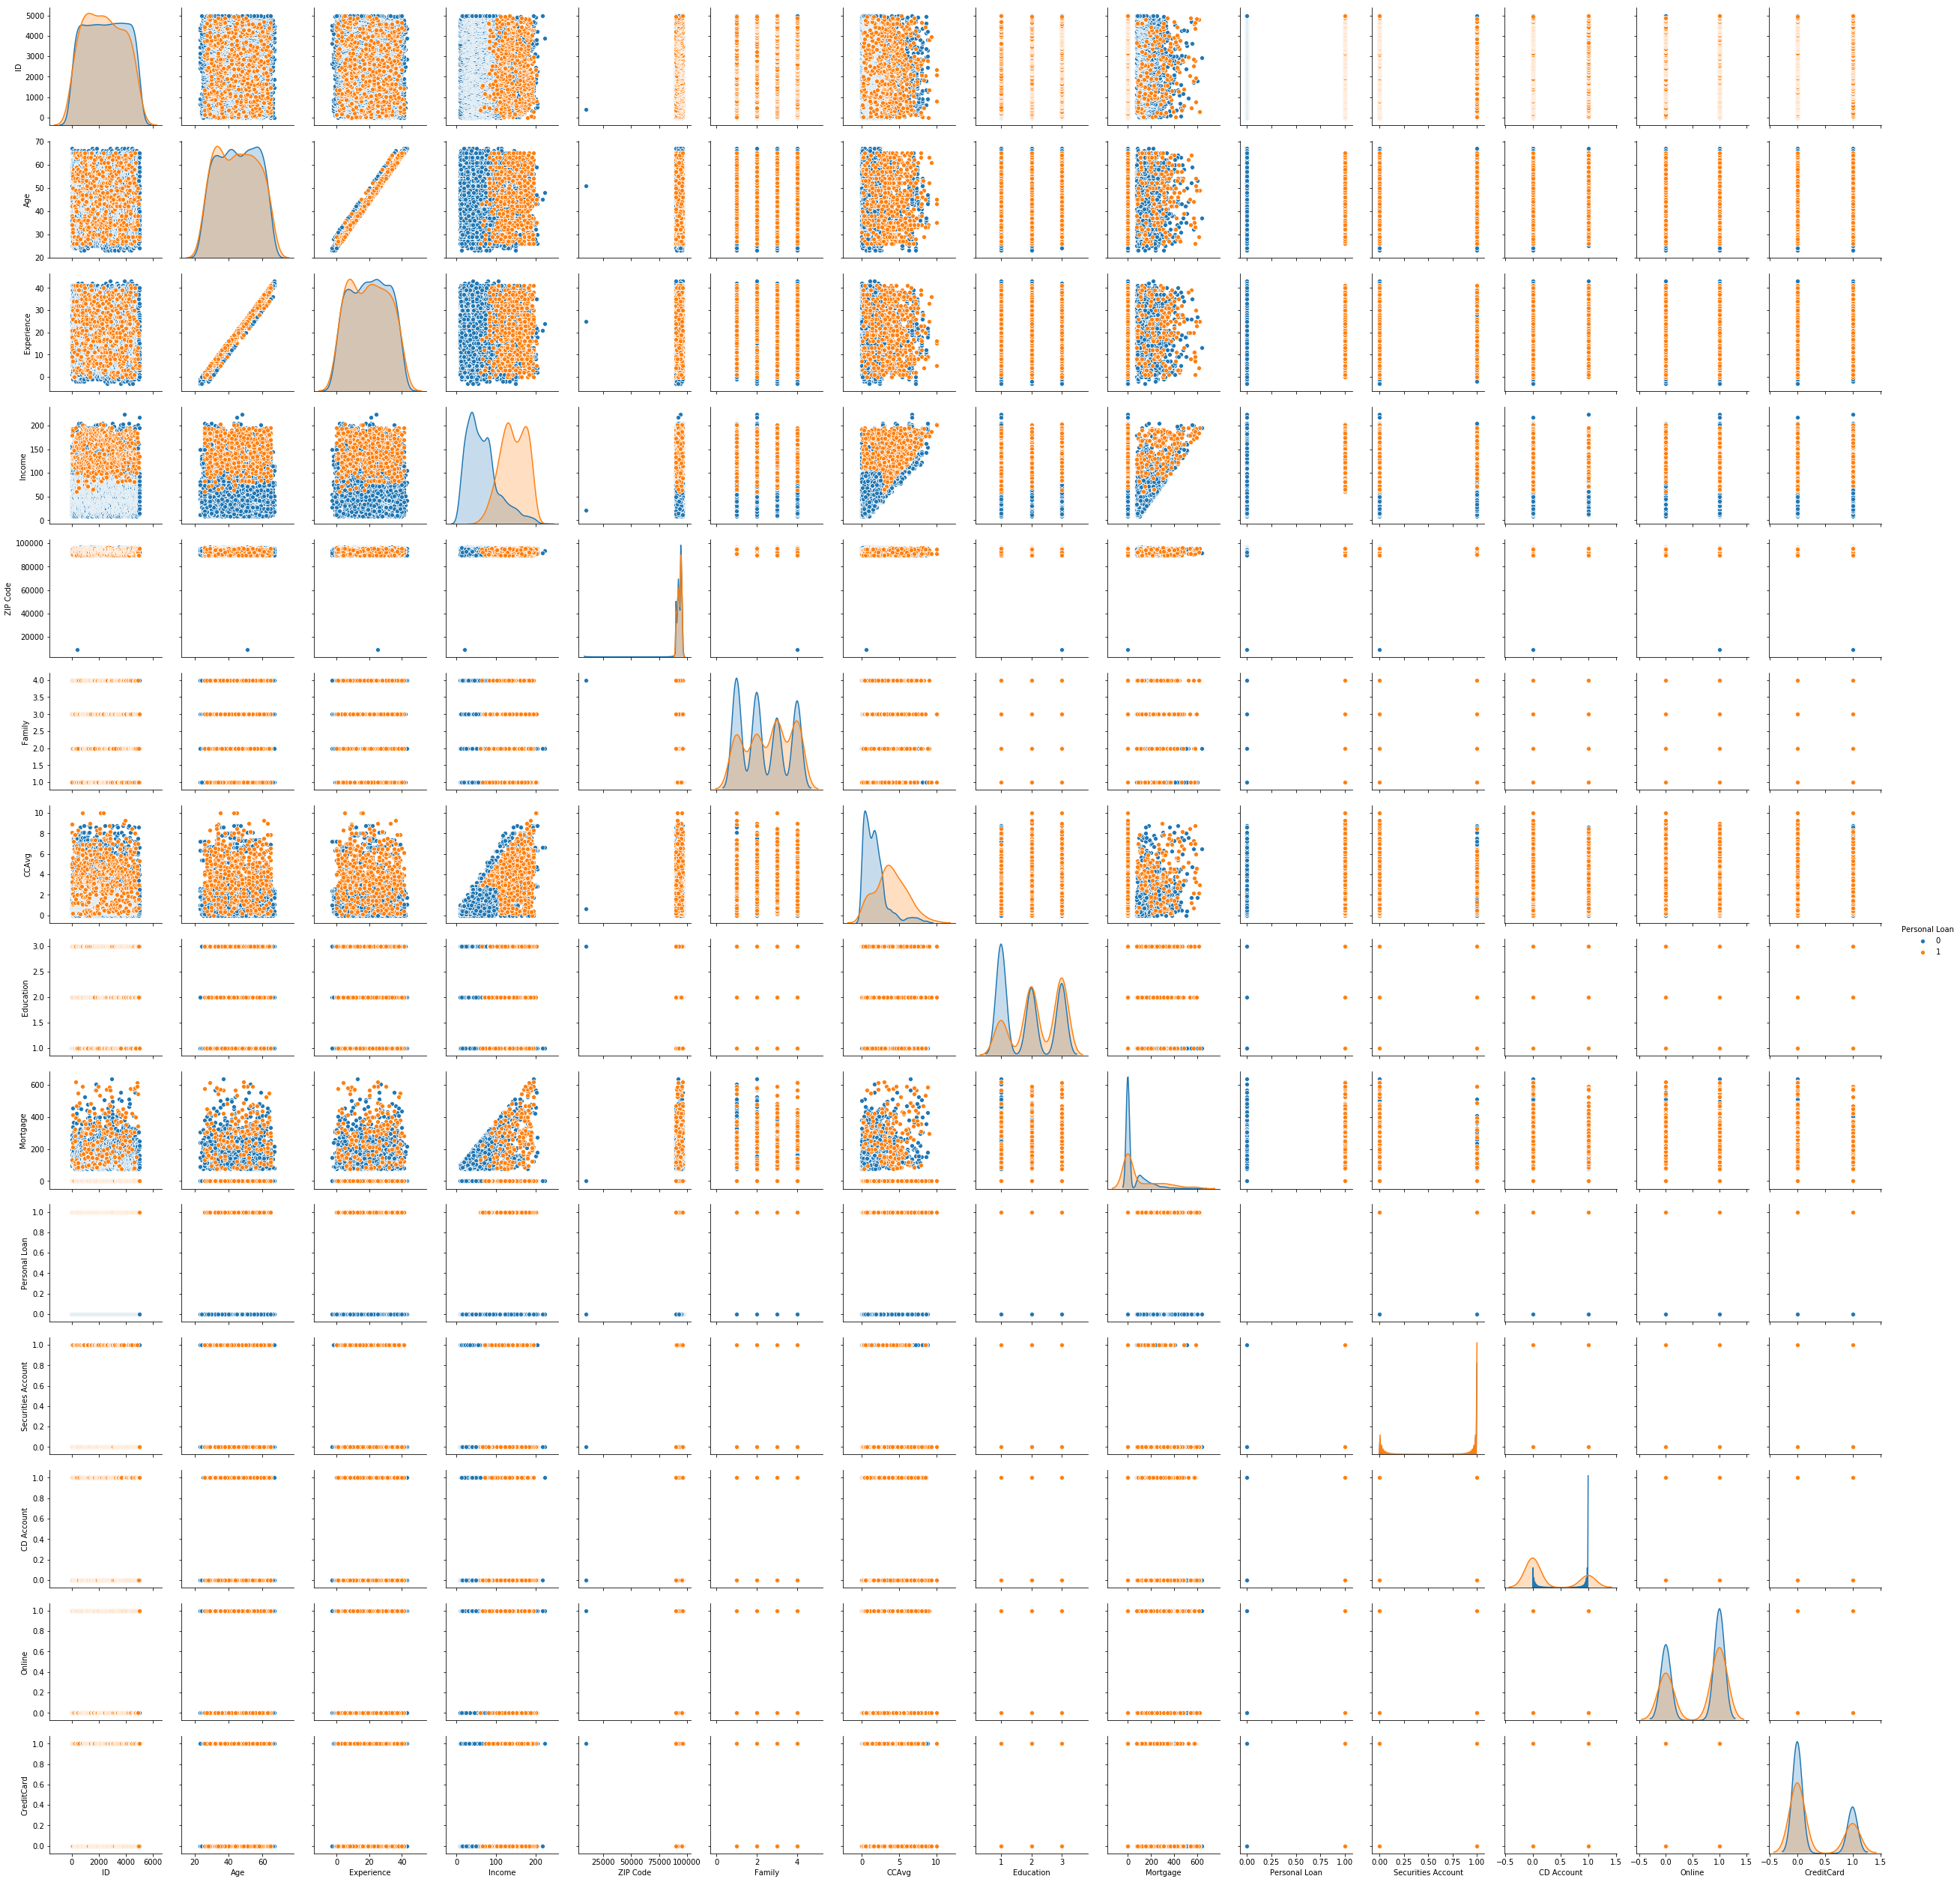

In [86]:
plt.figure(figsize=(40, 40))
sns.pairplot(dfBank,hue="Personal Loan")

## Information on the features or attributes
#### The variable ID & Zipcode does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction
#### Age feature is normally distributed with majority of customers falling between 23 years and 67 years of age. We can confirm this by looking at the describe statement above.
#### Experience is normally distributed . There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values or take absolute values.
#### Income is positively skewed.
#### CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
#### Mortgage- 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
#### The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [88]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
dfBank[dfBank['Experience'] < 0]['Experience'].count()
#In data set the value was correct but it was captured with wrong sign.let replace the values with absolute value.
dfBank["Experience"] = dfBank["Experience"].apply(abs)
# Based on assumptions we want to drop the ID and Zip features.
dfBank = dfBank.drop(['ID','ZIP Code'], axis=1)
dfBank.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

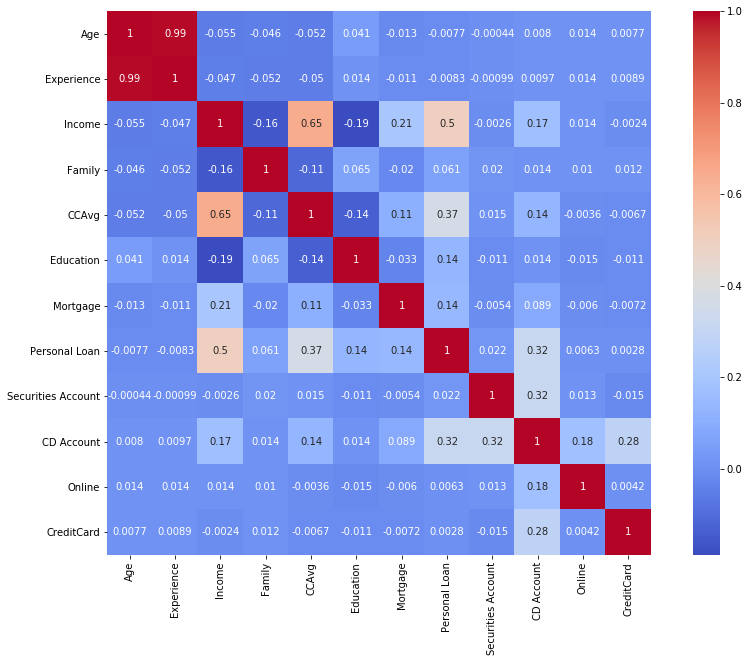

In [91]:
# Generating the correlation matrix and displaying correlation via heatmap
corr = dfBank.corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask,annot=True,square=True,cmap="coolwarm")

## Observation

#### Income and CCAvg is moderately correlated.
#### Age and Experience is highly correlated

# Get the target column distribution. Your comments.

###### Ratio of Opted Personal Loan vs not opted is 10:90

   Labels  Personal Loan
0       0           4520
1       1            480


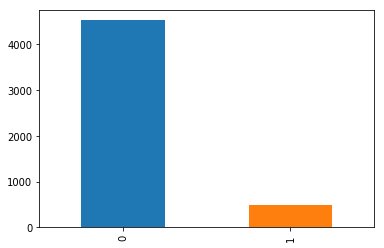

In [78]:
source_counts =pd.DataFrame(dfBank["Personal Loan"].value_counts()).reset_index()
source_counts.columns =["Labels","Personal Loan"]
print(source_counts)
source_counts["Personal Loan"].plot(kind='bar')

# Split the data into training and test set in the ratio of 70:30 respectively

In [55]:
from sklearn.model_selection import train_test_split
X=dfBank[['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard']]
y=dfBank["Personal Loan"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans and Print the confusion matrix for all the above models

#### Logistic Regration:

In [74]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predict = logmodel.predict(X_test.values)
predictProb = logmodel.predict_proba(X_test.values)
acc_log=round(metrics.accuracy_score(predict,y_test)*100,2)

print('The accuracy of the Logistic is',acc_log)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))

The accuracy of the Logistic is 95.67
confusion_matrix :
 [[1348   12]
 [  53   87]]


#### K-Nearest-Neighbors:

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

predict = knn.predict(X_test.values)
predictProb = knn.predict_proba(X_test.values)
acc_knn=round(metrics.accuracy_score(predict,y_test)*100,2)

print('The accuracy of the KNN is',acc_knn)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))

The accuracy of the KNN is 91.6
confusion_matrix :
 [[1320   40]
 [  86   54]]


#### Naïve Bayes:

In [77]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train, y_train)

predict = gb.predict(X_test)
predictProb = gb.predict_proba(X_test)
acc_nb=round(metrics.accuracy_score(predict,y_test)*100,2)

print('The accuracy of the Naïve Bayes is',acc_nb)
print("confusion_matrix :\n",confusion_matrix(y_test, predict))

The accuracy of the Naïve Bayes is 88.67
confusion_matrix :
 [[1253  107]
 [  63   77]]


# Give your reasoning on which is the best model in this case and why it performs better

## Model evaluation
##### We can now rank evaluation of all the models to choose the best one for the problem. We choose to use Logistic Regression as they have the highest accuracy and based on confusion matrix, the number of correct and incorrect predictions are better comparatively with other models. 

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Naive Bayes'],
    'Score': [ acc_log, acc_knn, acc_nb, 
              ]})
models.sort_values(by='Score', ascending=False)

Model  Score
0  Logistic Regression  95.67
1                  KNN  91.60
2          Naive Bayes  88.67